# Step 1 - Data loading and initial exploration

In [148]:
# Imports.
import pandas as pd
import matplotlib.pyplot as plt

# Load data & print the dataset.
dataset = 'data\modified_heart_dataset_supervised.csv'
df = pd.read_csv(dataset)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


In [149]:
# Display basice information about the dataset and check for missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 918 non-null    int64  
 1   Sex                 918 non-null    object 
 2   ChestPainType       918 non-null    object 
 3   RestingBP           918 non-null    int64  
 4   Cholesterol         918 non-null    int64  
 5   FastingBS           918 non-null    int64  
 6   RestingECG          918 non-null    object 
 7   MaxHR               918 non-null    int64  
 8   ExerciseAngina      918 non-null    object 
 9   Oldpeak             918 non-null    float64
 10  ST_Slope            918 non-null    object 
 11  GeneticMarker1      918 non-null    float64
 12  GeneticMarker2      918 non-null    int64  
 13  BodyWeightCategory  918 non-null    object 
 14  HeartDisease        918 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 107.7+ K

# Step 2 - Data preparation

In [150]:
# Secondary check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Age                   0
Sex                   0
ChestPainType         0
RestingBP             0
Cholesterol           0
FastingBS             0
RestingECG            0
MaxHR                 0
ExerciseAngina        0
Oldpeak               0
ST_Slope              0
GeneticMarker1        0
GeneticMarker2        0
BodyWeightCategory    0
HeartDisease          0
dtype: int64


In [151]:
# Check for duplicate values.
duplicate_values = df.duplicated().sum()
print(duplicate_values)

0


In [152]:
zero_cholesterol_count = (df['Cholesterol'] == 0).sum()
print(f"Number of patients with chol of 0 is: {zero_cholesterol_count}.")

Number of patients with chol of 0 is: 14.


# Step 3 - EDA

In [153]:
# Display summary stats.
print(df['Cholesterol'].describe())

count    918.000000
mean     198.787582
std      109.529397
min       -5.000000
25%      173.000000
50%      223.000000
75%      267.000000
max      607.000000
Name: Cholesterol, dtype: float64


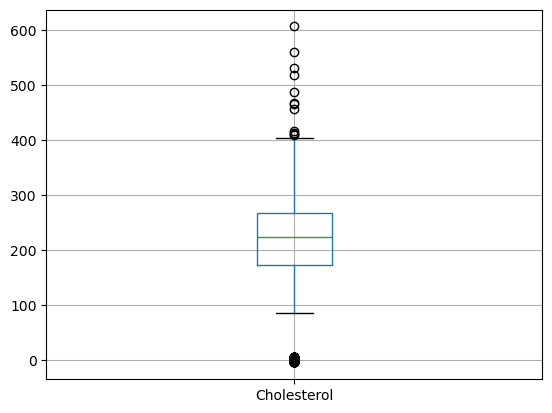

In [154]:
# Create a boxplot for Chol. col.
df.boxplot(column='Cholesterol')
plt.show()

In [155]:
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Cholesterol'] >= lower_bound) & (df['Cholesterol'] <= upper_bound)]
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  734.000000  734.000000   734.000000  734.000000  734.000000   
mean    52.889646  132.930518   240.807902    0.164850  140.158038   
std      9.494312   17.664659    51.121580    0.371298   24.703858   
min     28.000000   89.000000    86.000000    0.000000   71.000000   
25%     46.000000  121.000000   207.000000    0.000000  122.000000   
50%     54.000000  132.000000   236.000000    0.000000  141.000000   
75%     59.000000  143.000000   274.750000    0.000000  159.000000   
max     77.000000  196.000000   403.000000    1.000000  201.000000   

          Oldpeak  GeneticMarker1  GeneticMarker2  HeartDisease  
count  734.000000      734.000000      734.000000    734.000000  
mean     0.900954        0.507698    12774.478202      0.475477  
std      1.071986        0.293573     3699.655971      0.499739  
min     -0.100000        0.000188     3836.000000      0.000000  
25%      0.000000        0.253065    10

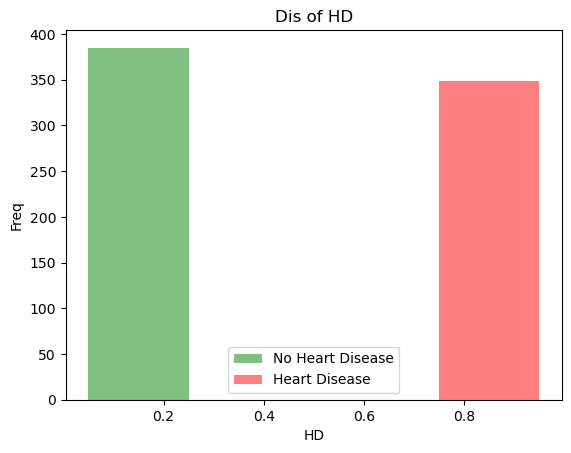

In [156]:
no_heart_disease = df[df['HeartDisease'] == 0]['HeartDisease']
heart_disease = df[df['HeartDisease'] == 1]['HeartDisease']

bins = 2

plt.hist([no_heart_disease, heart_disease], bins=bins, alpha=0.5, label=['No Heart Disease', 'Heart Disease'], color=['green', 'red'])

plt.xlabel("HD")
plt.ylabel("Freq")
plt.title("Dis of HD")

plt.legend()

plt.show()

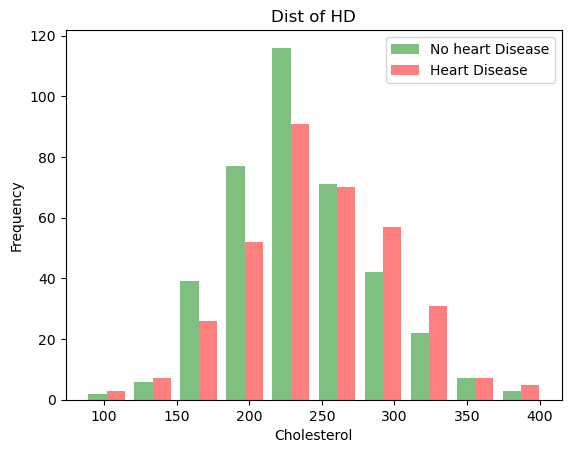

In [157]:
# Create the histograms side-by-side
plt.hist([df[df['HeartDisease'] == 0]['Cholesterol'], df[df['HeartDisease'] == 1]['Cholesterol']], bins=10, alpha=0.5, label=['No heart Disease', 'Heart Disease'], color=['green', 'red'], histtype='bar')

# Add labels and show the plot.
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Dist of HD')

# Add legend to the histogram.
plt.legend()

# Show the plot.
plt.show()

# Rel sex & HD

In [158]:
male_no_heart_disease = df[(df['HeartDisease'] == 0 & df['Sex'] == 'M')]
male_heart_disease = df[(df['HeartDisease'] == 1 & df['Sex'] == 'M')]
female_no_heart_disease = df[(df['HeartDisease'] == 0 & df['Sex'] == 'F')]
female_heart_disease = df[(df['HeartDisease'] == 1 & df['Sex'] == 'F')]

cats = ['Heart disease', 'No heart disease']
bar_width = 0.5

male_positions = [0, 1]
female_positions = [x + bar_width for x in male_positions]

male_heights = [len(male_heart_disease), len(male_no_heart_disease)]
female_heights = [len(female_heart_disease), len(female_no_heart_disease)]

# Create the bar plot.
plt.bar(male_positions, male_heights, bar_width, label='Male', color='blue')
plt.bar(female_positions, female_heights, bar_width, label='Female', color='pink')

# Add labels and title to the plot.
plt.xlabel('Heart Disease')
plt.ylabel('Number of Cases')
plt.title('Comparison of Heart Disease Cases between Males and Females')

# Add x-axis tick labels.
plt.xticks([0.17, 1.17], cats)

# Add legend to the plot.
plt.legend()

plt.show()

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]